# Removing Trends - Lab

## Introduction

In this lab, you'll practice your detrending skills!

## Objectives

In this lab you will: 

- Use a log transformation to minimize non-stationarity 
- Use rolling means to reduce non-stationarity 
- Use differencing to reduce non-stationarity 
- Use rolling statistics as a check for stationarity 
- Create visualizations of transformed time series as a visual aid to determine if stationarity has been achieved 
- Use the Dickey-Fuller test and conclude whether or not a dataset is exhibiting stationarity 


## Detrending the Air passenger data 

In this lab you will work with the air passenger dataset available in `'passengers.csv'`. First, run the following cell to import the necessary libraries. 

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

- Import the `'passengers.csv'` dataset 
- Change the data type of the `'Month'` column to a proper date format 
- Set the `'Month'` column as the index of the DataFrame 
- Print the first five rows of the dataset 

In [107]:
# Import 'passengers.csv' dataset
data = pd.read_csv('passengers.csv')

# Change the data type of the 'Month' column
data['Month'] = pd.to_datetime(data['Month'])

# Set the 'Month' column as the index
ts = data.set_index("Month")

# Print the first five rows
ts.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Plot this time series. 

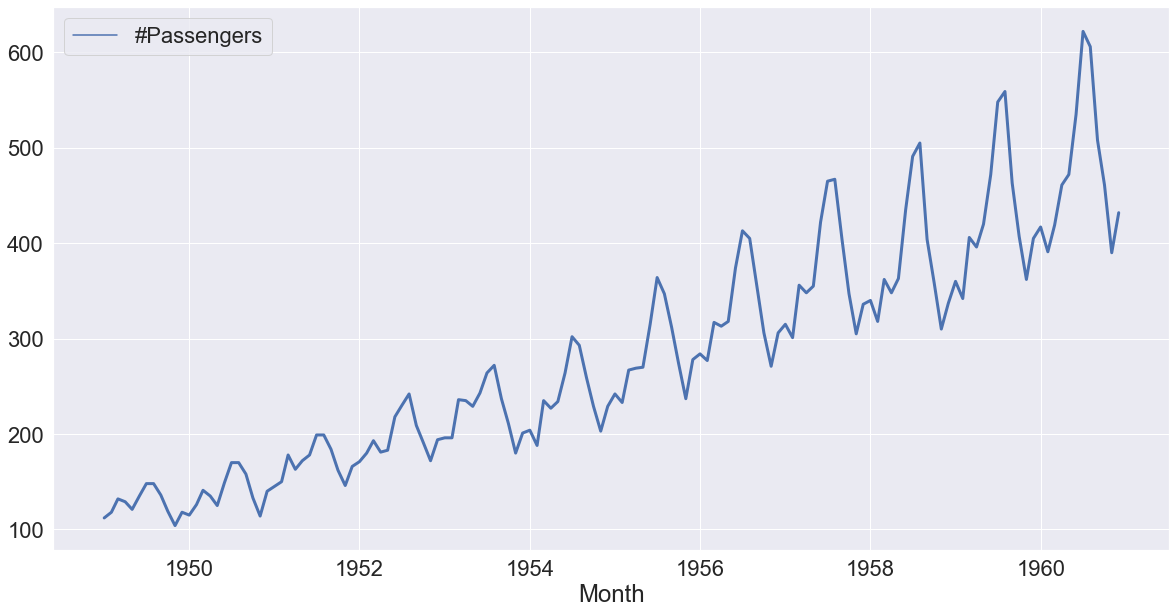

In [117]:
# Plot the time series
sns.set(rc={"figure.figsize":(20, 10)}, font_scale=2)
sns.lineplot(data = ts, linewidth = 3);

## Create a stationarity check

Your next task is to use the code from previous labs to create a function `stationarity_check()` that takes in a time series and performs stationarity checks including rolling statistics and the Dickey-Fuller test. 

We want the output of the function to: 

- Plot the original time series along with the rolling mean and rolling standard deviation (use a window of 8) in one plot 
- Output the results of the Dickey-Fuller test 

In [118]:
# Create a function to check for the stationarity of a given time series 
# using rolling stats and DF test
# Collect and package the code from previous labs

def stationarity_check(data):
    import seaborn as sns
    import pandas as pd
    from statsmodels.tsa.stattools import adfuller
    
    Moving_Average = data.rolling(8).mean()
    Moving_STD = data.rolling(8).std()
    
    sns.set(rc={"figure.figsize":(20, 10)}, font_scale=2)
    
    sns.lineplot(data = Moving_Average, color = "red", 
             label = "Moving Average", linewidth = 2)
    sns.lineplot(data = Moving_STD, color = "blue", 
             label = "Moving STD" , linewidth = 2)
    sns.lineplot(data = data, color = "black", label = "Original", linewidth = 2);
    
    
    
    
    adfuller_result = adfuller(data)
    
    lis = ["Test Statistics:", "P Value:", 
       "Number of Lags:", "Number of Observations:",
       "Critical values", "Maximized Information Criterion:"]

    for i, item in enumerate(adfuller_result):
        
        if lis[i] == "Critical values":
            print(lis[i] + " " + list(item.keys())[0] + ":     " , 
                  item[list(item.keys())[0]])
            print(lis[i] + " " + list(item.keys())[1] + ":     " , 
                  item[list(item.keys())[1]])
            print(lis[i] + " " + list(item.keys())[2] + ":     " , 
                  item[list(item.keys())[2]])
        else:
            print(lis[i], "      ", item)

    
    
    


Use your newly created function on the `ts` timeseries. 

Test Statistics:        0.815368879206047
P Value:        0.991880243437641
Number of Lags:        13
Number of Observations:        130
Critical values 1%:      -3.4816817173418295
Critical values 5%:      -2.8840418343195267
Critical values 10%:      -2.578770059171598
Maximized Information Criterion:        996.6929308390189


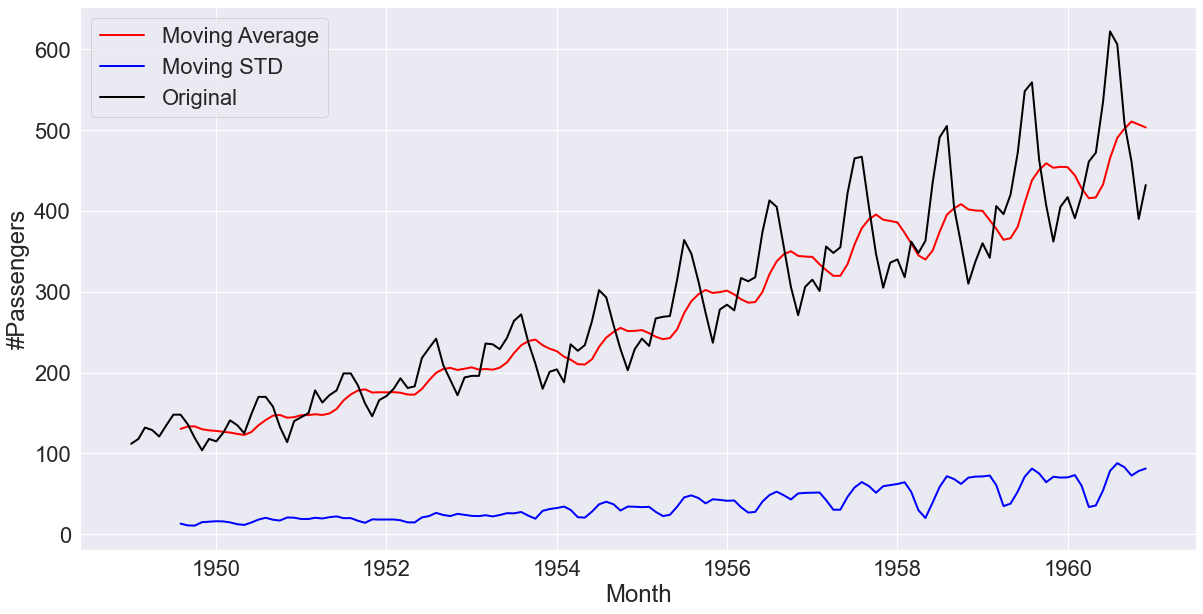

In [119]:
# Code here
stationarity_check(ts["#Passengers"])

## Perform a log and square root transform

Plot a log transform of the original time series (`ts`). 

In [120]:
# Plot a log transform

ts["Log Passengers"] = np.log(ts["#Passengers"])
ts["Squared Passengers"] = np.sqrt(ts["#Passengers"])

Plot a square root  transform of the original time series (`ts`). 

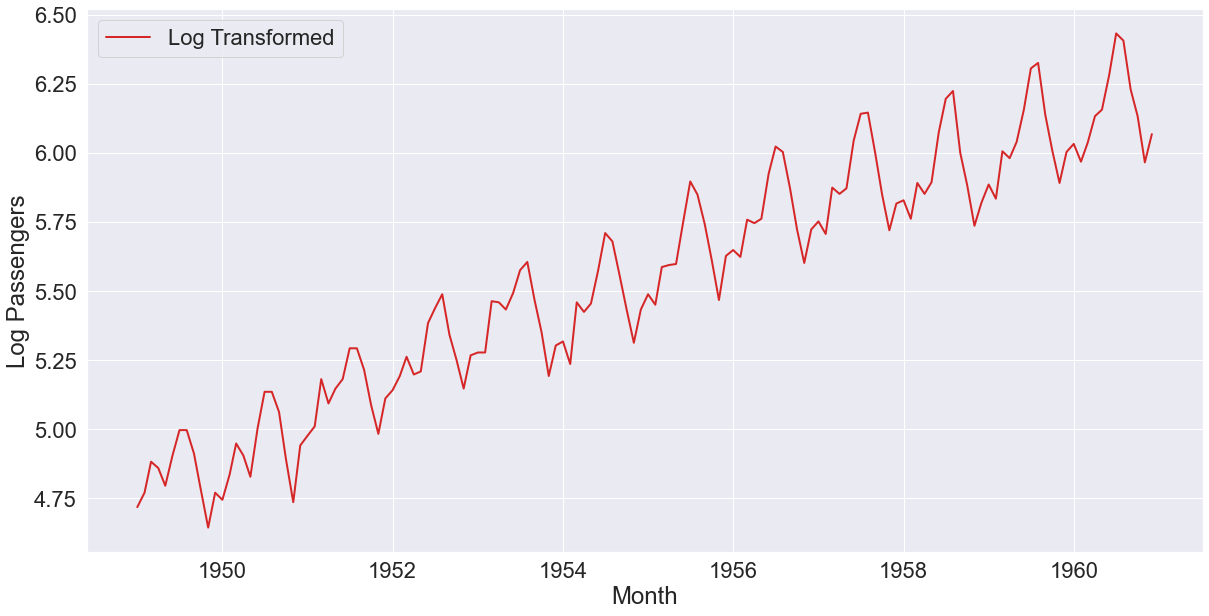

In [121]:
# Plot a square root transform
sns.set(rc={"figure.figsize":(20, 10)}, font_scale=2)
sns.lineplot(x = ts.index, y = ts["Log Passengers"], color = "tab:red", 
             label = "Log Transformed", linewidth = 2);

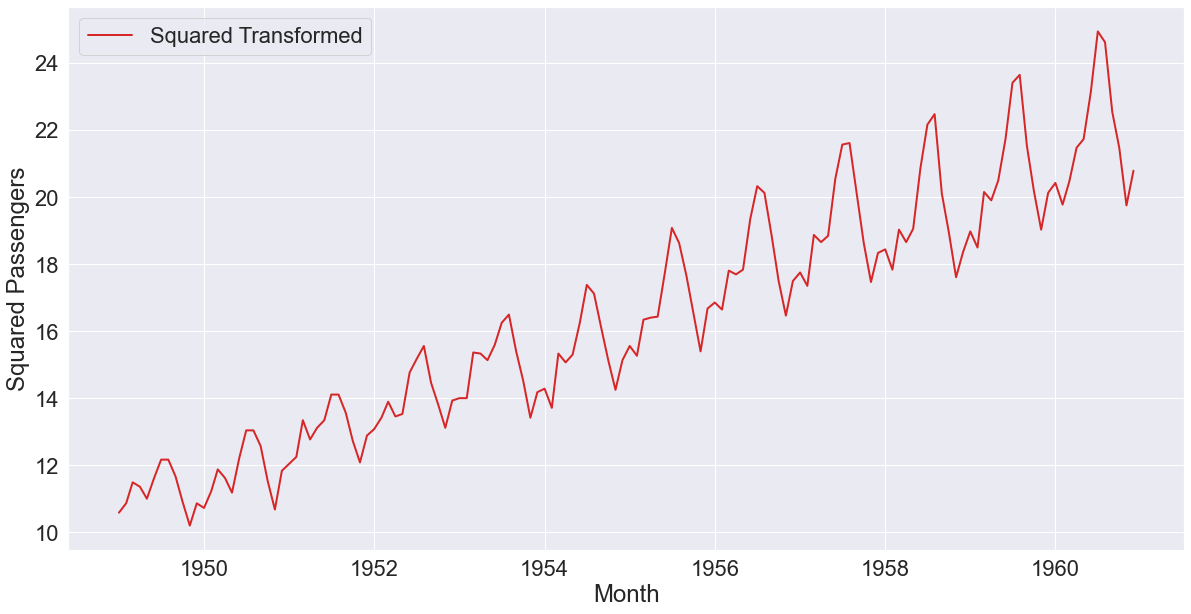

In [122]:
# Plot a square root transform
sns.set(rc={"figure.figsize":(20, 10)}, font_scale=2)
sns.lineplot(x = ts.index, y = ts["Squared Passengers"], color = "tab:red", 
             label = "Squared Transformed", linewidth = 2);

Going forward, let's keep working with the log transformed data before subtracting rolling mean, differencing, etc.

## Subtracting the rolling mean

Create a rolling mean using your log transformed time series, with a time window of 7. Plot the log-transformed time series and the rolling mean together.

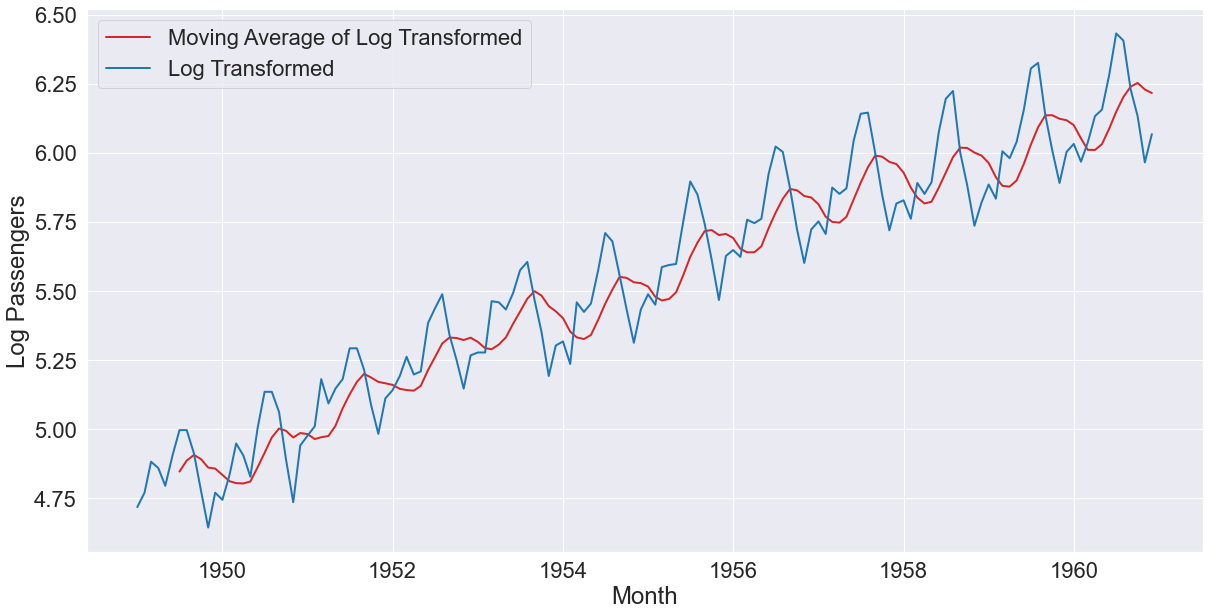

In [123]:
# your code here
roll_mean = ts["Log Passengers"].rolling(7).mean()
# fig = plt.figure(figsize=(11,7)) 
sns.set(rc={"figure.figsize":(20, 10)}, font_scale=2)
sns.lineplot(x = roll_mean.index, y = roll_mean.values,
             color = "tab:red", linewidth = 2,
             label = "Moving Average of Log Transformed");
sns.lineplot(x = ts.index, y = ts["Log Passengers"], 
             color = "tab:blue", linewidth = 2,
             label = "Log Transformed");
# roll_mean.head(15)


Now, subtract this rolling mean from the log transformed time series, and look at the 10 first elements of the result.  

In [66]:
# Subtract the moving average from the log transformed data
data_minus_roll_mean = ts["Log Passengers"] - roll_mean

# Print the first 10 rows
data_minus_roll_mean.head(10)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01    0.150059
1949-08-01    0.110242
1949-09-01    0.005404
1949-10-01   -0.113317
Name: Log Passengers, dtype: float64

Drop the missing values from this time series. 

In [67]:
# Drop the missing values
data_minus_roll_mean.dropna(inplace = True)

Plot this time series now. 

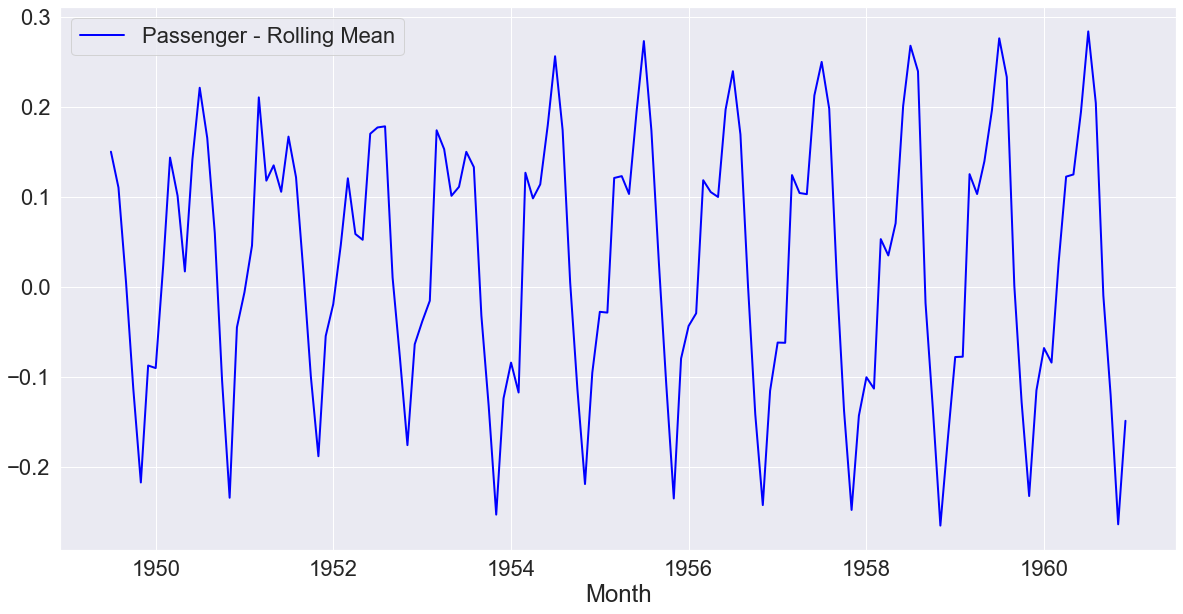

In [124]:
# Plot the result
sns.set(rc={"figure.figsize":(20, 10)}, font_scale=2)
sns.lineplot(x = data_minus_roll_mean.index, 
             y = data_minus_roll_mean.values,
             color = "blue", linewidth = 2, label = "Passenger - Rolling Mean");

Finally, use your function `stationarity_check()` to see if this series is stationary!

Test Statistics:        -2.348027002858881
P Value:        0.15694559814094516
Number of Lags:        14
Number of Observations:        123
Critical values 1%:      -3.4846672514209773
Critical values 5%:      -2.8853397507076006
Critical values 10%:      -2.5794629869786503
Maximized Information Criterion:        -461.224371787578


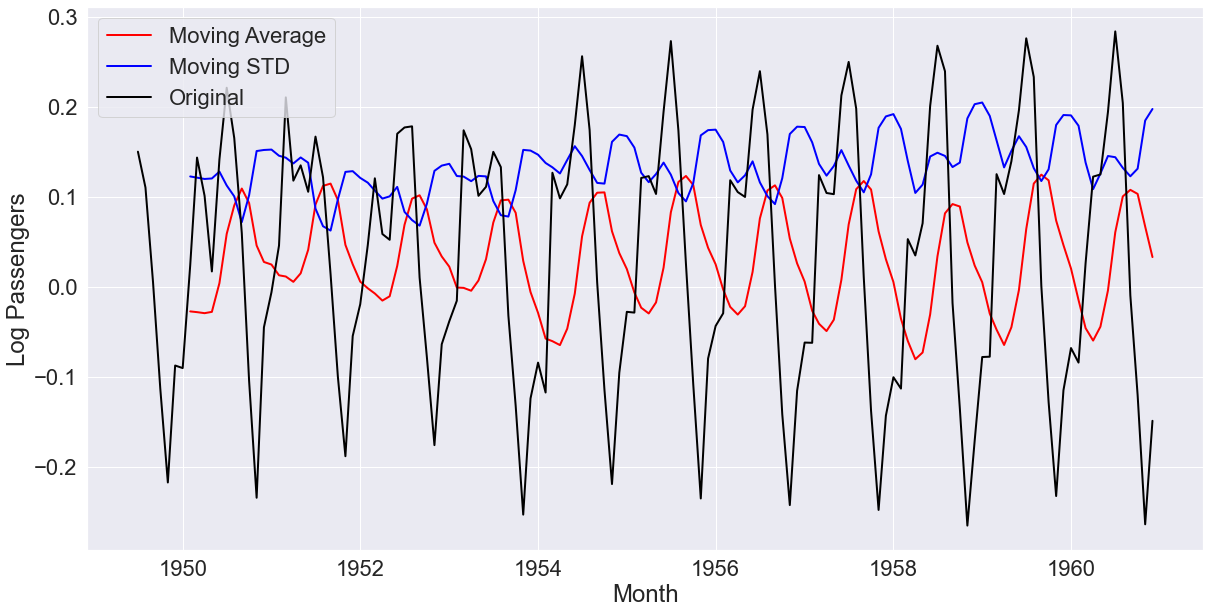

In [125]:
# Your code here
stationarity_check(data_minus_roll_mean)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


In [126]:
# Your conclusion here
## This time series is not stationary because p-value is greater than 0.05.

## Subtracting the weighted rolling mean

Repeat all the above steps to calculate the exponential *weighted* rolling mean with a halflife of 4. Start from the log-transformed data again. Compare the Dickey-Fuller test results. What do you conclude?

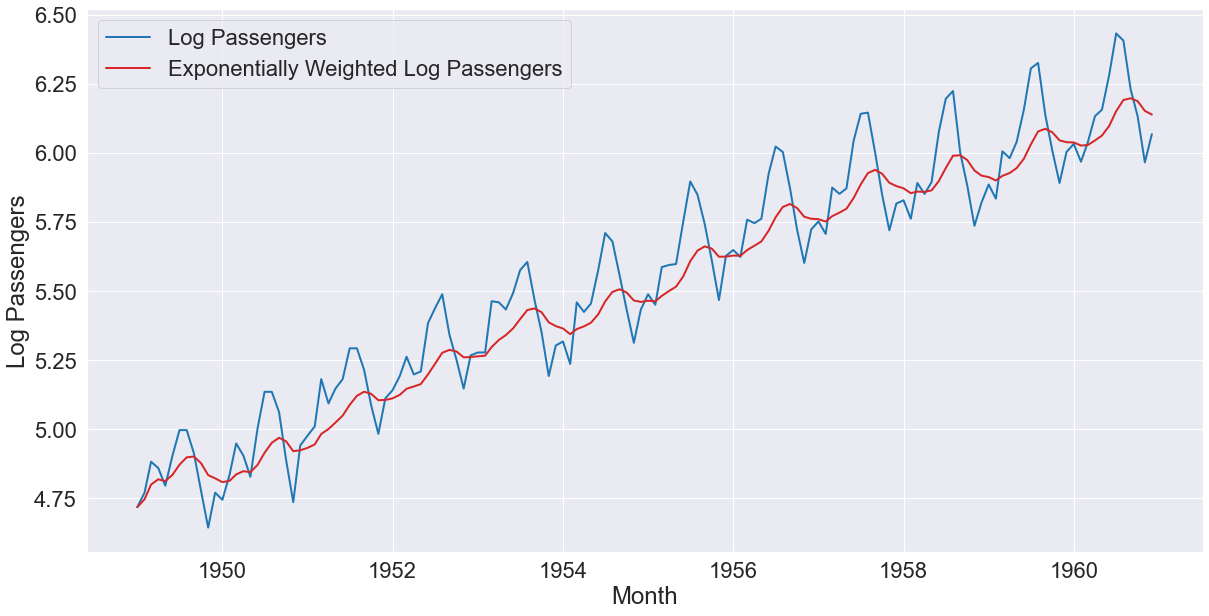

In [128]:
# Calculate Weighted Moving Average of log transformed data
exp_roll_mean = ts["Log Passengers"].ewm(halflife = 4).mean()

# Plot the original data with exp weighted average
sns.set(rc={"figure.figsize":(20, 10)}, font_scale=2)
sns.lineplot(data = ts["Log Passengers"], color = "tab:blue", linewidth = 2,
            label = "Log Passengers")
sns.lineplot(data = exp_roll_mean, color = "tab:red", linewidth = 2,
            label = "Exponentially Weighted Log Passengers");

- Subtract this exponential weighted rolling mean from the log transformed data  
- Print the resulting time series 

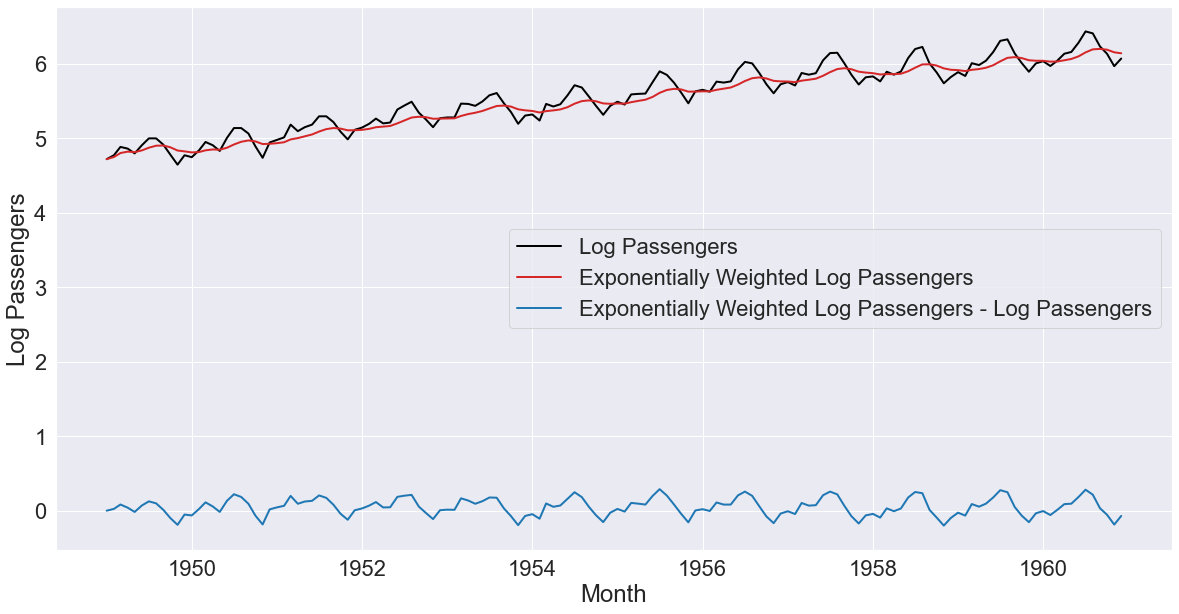

In [129]:
# Subtract the exponential weighted rolling mean from the original data 
data_minus_exp_roll_mean = ts["Log Passengers"] - exp_roll_mean 

# Plot the time series
sns.set(rc={"figure.figsize":(20, 10)}, font_scale=2)
sns.lineplot(data = ts["Log Passengers"], color = "black", linewidth = 2,
            label = "Log Passengers")
sns.lineplot(data = exp_roll_mean, color = "tab:red", linewidth = 2,
            label = "Exponentially Weighted Log Passengers");
sns.lineplot(data = data_minus_exp_roll_mean, color = "tab:blue", linewidth = 2,
            label = "Exponentially Weighted Log Passengers - Log Passengers");



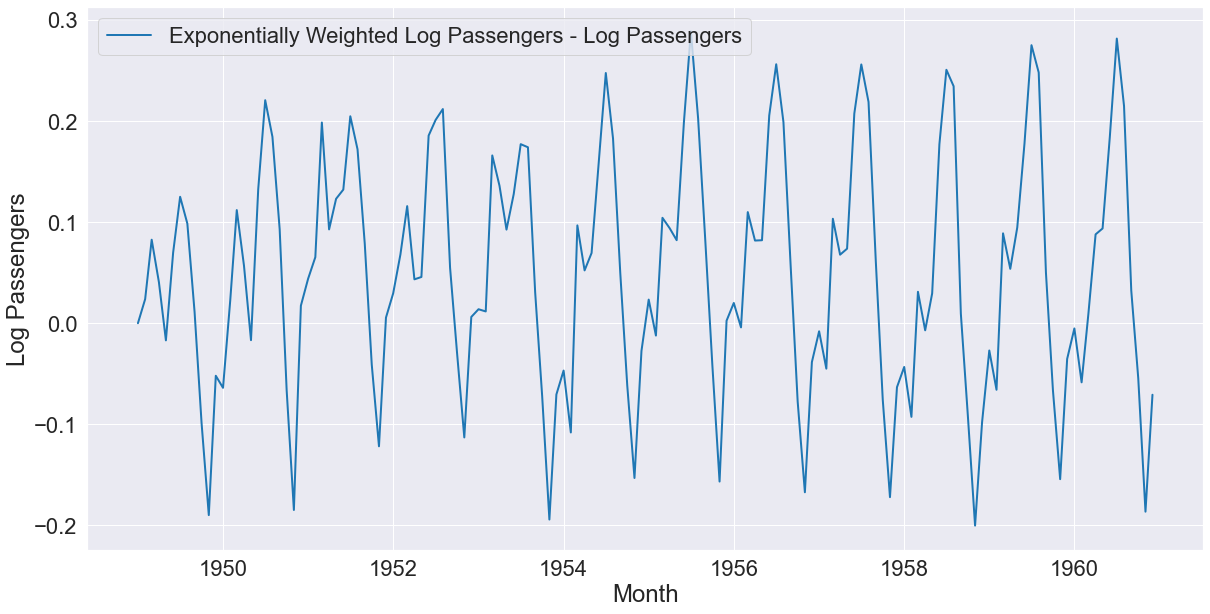

In [130]:
sns.set(rc={"figure.figsize":(20, 10)}, font_scale=2)
sns.lineplot(data = data_minus_exp_roll_mean, color = "tab:blue", linewidth = 2,
            label = "Exponentially Weighted Log Passengers - Log Passengers");

Check for stationarity of `data_minus_exp_roll_mean` using your function. 

Test Statistics:        -3.29725032203751
P Value:        0.015001833471825963
Number of Lags:        13
Number of Observations:        130
Critical values 1%:      -3.4816817173418295
Critical values 5%:      -2.8840418343195267
Critical values 10%:      -2.578770059171598
Maximized Information Criterion:        -487.60519308050493


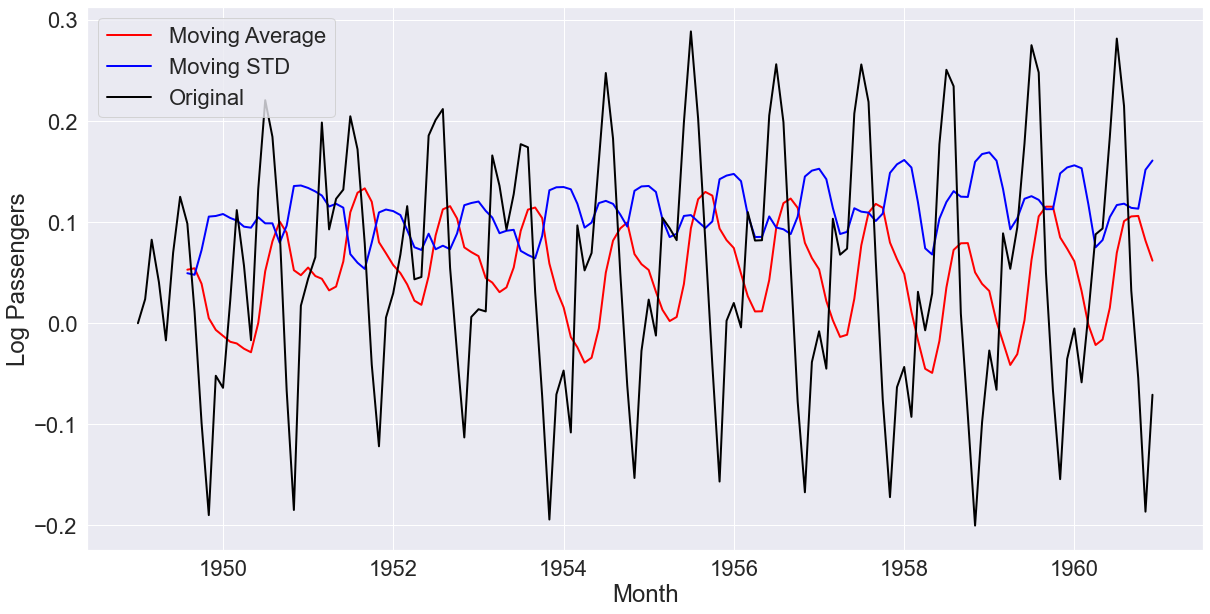

In [131]:
# Do a stationarity check
stationarity_check(data_minus_exp_roll_mean)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


In [ ]:
# Your conclusion here

# This time series is stationary because p value is less than 0.05, but there
# is a strong seasonality. 

## Differencing

Using exponentially weighted moving averages, we seem to have removed the upward trend, but not the seasonality issue. Now use differencing to remove seasonality. Make sure you use the right amount of `periods`. Start from the log-transformed, exponentially weighted rolling mean-subtracted series.

After you differenced the series, drop the missing values, plot the resulting time series, and then run the `stationarity check()` again.

In [101]:
# Difference your data
data_diff = data_minus_exp_roll_mean.diff(periods = 12)

# Drop the missing values
data_diff.dropna(inplace = True)

# Check out the first few rows
data_diff.head(15)

Month
1950-01-01   -0.063907
1950-02-01   -0.001185
1950-03-01    0.029307
1950-04-01    0.016168
1950-05-01    0.000194
1950-06-01    0.062669
1950-07-01    0.095524
1950-08-01    0.085827
1950-09-01    0.081834
1950-10-01    0.032363
1950-11-01    0.005065
1950-12-01    0.069320
1951-01-01    0.107890
1951-02-01    0.042702
1951-03-01    0.086617
Name: Log Passengers, dtype: float64

Plot the resulting differenced time series. 

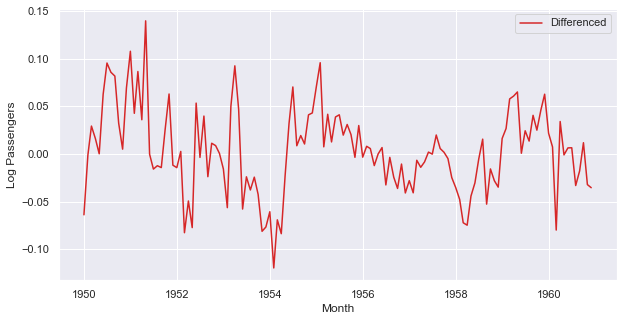

In [102]:
# Plot your differenced time series

sns.lineplot(data = data_diff, color = "tab:red",
            label = "Differenced");

Test Statistics:        -3.601666483538003
P Value:        0.005729247969742638
Number of Lags:        12
Number of Observations:        119
Critical values 1%:      -3.4865346059036564
Critical values 5%:      -2.8861509858476264
Critical values 10%:      -2.579896092790057
Maximized Information Criterion:        -461.03487173309964


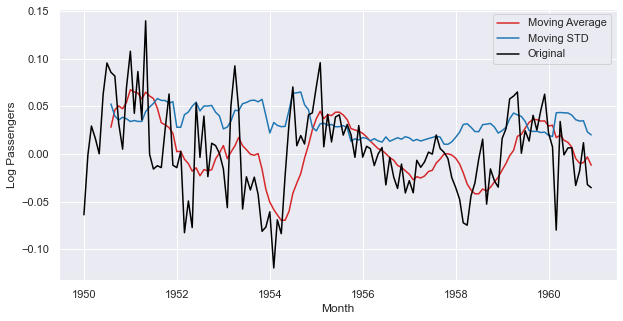

In [103]:
# Perform the stationarity check
stationarity_check(data_diff)

### Your conclusion

In [104]:
# Your conclusion here

## G

# Even though the rolling mean and rolling average lines do seem to be 
# fluctuating, the movements seem to be completely random, and the same 
# conclusion holds for the original time series. Your time series is now 
# ready for modeling!


## Summary 

In this lab, you learned how to make time series stationary through using log transforms, rolling means, and differencing.